In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# XOR Dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])
# Shape: (4, 1)

In [ ]:
for i in range(len(X)):
  print(f"Input: {X[i]} -> Output: {y[i][0]}")

# loops through dataset

Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 1
Input: [1 0] -> Output: 1
Input: [1 1] -> Output: 0


In [ ]:
# Network Architectural Constants
INPUT_SIZE = 2
HIDDEN_SIZE = 4
OUTPUT_SIZE = 1

In [29]:
# initializing weights

# Creates random values of shape (INPUT_SIZE, HIDDEN_SIZE) and scales them by 0.5.
weights_input_hidden = np.random.randn(INPUT_SIZE, HIDDEN_SIZE) * 0.5

# Creates a zero matrix of shape (1, HIDDEN_SIZE) for biases.
bias_hidden = np.zeros((1, HIDDEN_SIZE))

In [ ]:
weights_hidden_output = np.random.randn(HIDDEN_SIZE, OUTPUT_SIZE) * 0.5
bias_output = np.zeros((1, OUTPUT_SIZE))

In [ ]:
print("Network initialzed with random weights:")
print(f"Input -> Hidden weights shape: {weights_input_hidden.shape}")
print(f"Hidden -> Output weights shape: {weights_hidden_output.shape}")
print(f"\ntotal parameters: {weights_hidden_output.size + bias_hidden.size + weights_input_hidden.size + bias_output.size}")

Network initialzed with random weights:
Input -> Hidden weights shape: (2, 4)
Hidden -> Output weights shape: (4, 1)

total parameters: 17


In [ ]:
# applying activation function
# sigmoid: squashes between 0 and 1

def sigmoid(x):
  return 1 / (1+np.exp(-x))

def sigmoid_derivative(x):
  s = sigmoid(x)
  return s * (1-s)

# sigmoid used for forward pass, makes output linear bw 0 and 1
# sigmoid_derivative, backpropagation, how much to adjust weights

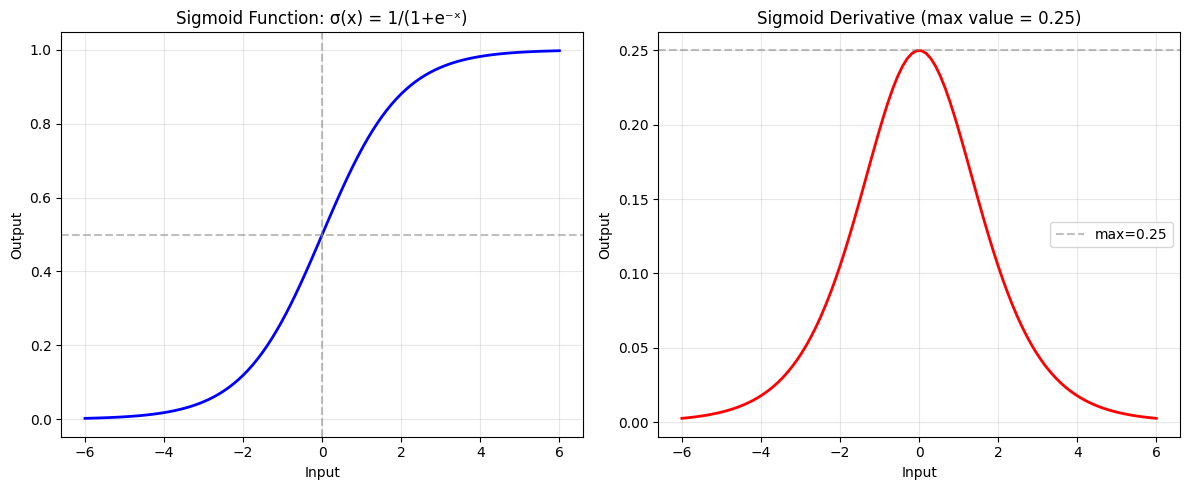

In [ ]:
# Visualizing sigmoid
x_range = np.linspace(-6, 6, 100)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_range, sigmoid(x_range), 'b-', linewidth=2)
# blue solid line
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
# drawing horizontal line at specified v value
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
# drawing horizontal line at specified v value
# alpha controls transparency (0: transparent, 1: opaque)

plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid Function: σ(x) = 1/(1+e⁻ˣ)')
plt.grid(True, alpha=0.3)


plt.subplot(1, 2, 2)
plt.plot(x_range, sigmoid_derivative(x_range), 'r-', linewidth=2)
# r solid line
plt.axhline(y=0.25, color='gray', linestyle='--', alpha=0.5, label='max=0.25')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid Derivative (max value = 0.25)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# forward pass
# combine inputs
# add bias
# apply activation
# produce final prediction

def forward(x):
  '''
  Forward pass through the network
  Return all intermediate values
  '''
  # X @ W + b
  # input to hidden layer
  z_hidden = np.dot(X, weights_input_hidden) + bias_hidden

  # sigmoid(z_hidden)
  # applying activation
  a_hidden = sigmoid(z_hidden)

  # Hidden to output
  # a_hidden @ W + b
  z_output = np.dot(a_hidden, weights_hidden_output) + bias_output

  a_output = sigmoid(z_output)

  return z_hidden, a_hidden, z_output, a_output

In [ ]:
z_h, a_h, z_o, predictions = forward(X)
# store returned values into given variables

In [ ]:
print("Forward pass with UNTRAINED network:")
print("-" * 50)
for i in range(len(X)):
  print(f"Input: {X[i]} -> Prediction: {predictions[i][0]:.4f} (Target: {y[i][0]})")

Forward pass with UNTRAINED network:
--------------------------------------------------
Input: [0 0] -> Prediction: 0.3558 (Target: 0)
Input: [0 1] -> Prediction: 0.3710 (Target: 1)
Input: [1 0] -> Prediction: 0.3688 (Target: 1)
Input: [1 1] -> Prediction: 0.3825 (Target: 0)


In [ ]:
# predictions are garbage, the network has not learned anything

In [ ]:
# loss function
def compute_loss(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

In [ ]:
# Calculate initial loss
initial_loss = compute_loss(y, predictions)
print(f"Initial Loss (untrained): {initial_loss:.4f}")
print("\nThis number should decrease as we train.")

Initial Loss (untrained): 0.2667

This number should decrease as we train.


In [ ]:
# backpropagation

# which weights caused error and by how much
# update weights slightly in the directionn that reduces error
def backward(X, y, a_hidden, z_hidden, z_output, a_output, learning_rate):
  global weights_input_hidden, bias_hidden, bias_output, weights_hidden_output
  m = X.shape[0]
  output_error = a_output - y
  # difference between actual and pred values

  output_delta = output_error * sigmoid_derivative(z_output)
  # by how much the slopes change
  # multiplying derivative to find slope

  # compute gradient
  # gradient: how much error chages if a weight slightly changes
  # how much each weight contributed to the error
  grad_weights_hidden_output = np.dot(a_hidden.T, output_delta) / m
  grad_bias_output = np.mean(output_delta, axis=0, keepdims=True)

  # how much each neuron contribute to the output error
  hidden_error = np.dot(output_delta, weights_hidden_output.T)

  # mutiply derivative to scale correctly
  hidden_delta = hidden_error * sigmoid_derivative(z_hidden)

  # compute gradient for input to hidden layer
  grad_weights_input_hidden = np.dot(X.T, hidden_delta) / m
  grad_bias_hidden = np.mean(hidden_delta, axis=0, keepdims=True)

  # update weights
  # weights: old W - learning rate * gradient

  # how much each hidden -> output weight contributed to error
  # multiply by learning rate to control size
  # subtract to more towards lower error
  weights_hidden_output -= learning_rate * grad_weights_hidden_output

  # updating output bias
  # bias shifts output
  # subtract from value
  bias_output -= learning_rate * grad_bias_output

  # update input -> hidden weights, which affect activation, thus o/p
  # correct based on propagated error
  weights_input_hidden -= learning_rate * grad_weights_input_hidden
  bias_hidden -= learning_rate * grad_bias_hidden

In [30]:
'''
large gradient: weight strongly effects error
small gradient: weight has little effect
positive gradient: increasing weight increases error
negative gradient: increasing weight decreases error
'''

'\nlarge gradient: weight strongly effects error\nsmall gradient: weight has little effect\npositive gradient: increasing weight increases error\nnegative gradient: increasing weight decreases error\n'

In [ ]:
# training loop

# fixes randomeness so results are reproducible
np.random.seed(42)

# reinitialize weights and biases to random values and zeros
weights_input_hidden = np.random.randn(INPUT_SIZE, HIDDEN_SIZE) * 0.5
bias_hidden = np.zeros((1, HIDDEN_SIZE))
weights_hidden_output = np.random.rand(HIDDEN_SIZE, OUTPUT_SIZE) * 0.5
bias_output = np.zeros((1, OUTPUT_SIZE))

In [ ]:
learning_rate = 2.0 # step size for updates
iterations = 10000 # number of training cycles

In [ ]:
loss_history = [] # loss values over time

In [ ]:
print("Training started")
print("-"*50)

# main training loop
for i in range(iterations):
  z_h, a_h, z_o, predictions = forward(X)

  loss = compute_loss(y, predictions)
  loss_history.append(loss)

  backward(X, y, z_h, a_h, z_o, predictions, learning_rate)

  if i % 2000 == 0:
    print(f"iterations {i:5d} | Loss: {loss:.6f}")
  # printing current loss, every 2000 iterations to monitor improvement

Training started
--------------------------------------------------
iterations     0 | Loss: 0.268562
iterations  2000 | Loss: 0.249619
iterations  4000 | Loss: 0.248927
iterations  6000 | Loss: 0.247608
iterations  8000 | Loss: 0.245631


In [ ]:
_, _, _, final_predictions = forward(X)
# forward returns 4 values, _ mens we dont need those values, ignore and store only a_o/p in predictions

print("Final Results after Training: ")
print("-" * 50)
print(f"{'Input':<12}{'Target':<10}{'Prediction':<12}{'Rounded':10}")
print("-" * 50)

# loop for each input
for i in range(len(X)):
  # check XOR
  pred = final_predictions[i][0]
  rounded = round(pred)
  # get predictions rounded
  status = "Done" if rounded == y[i][0] else "No"
  print(f"{str(X[i]):<12} {y[i][0]:<10} {pred:<12.4f} {rounded:<10} {status}")

print("-" * 50)
print("The network learned XOR from random weights")

Final Results after Training: 
--------------------------------------------------
Input       Target    Prediction  Rounded   
--------------------------------------------------
[0 0]        0          0.4927       0          Done
[0 1]        1          0.5072       1          Done
[1 0]        1          0.5074       1          Done
[1 1]        0          0.4927       0          Done
--------------------------------------------------
The network learned XOR from random weights


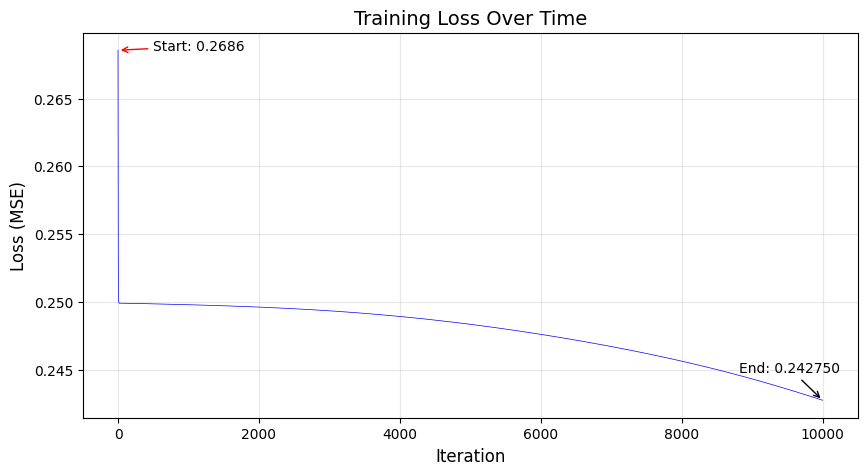

The loss started high (random guessing) and decreased (learning).


In [ ]:
# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(loss_history, 'b-', linewidth=0.5)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Training Loss Over Time', fontsize=14)
plt.grid(True, alpha=0.3)

# Add annotations
plt.annotate(f'Start: {loss_history[0]:.4f}',
             xy=(0, loss_history[0]), fontsize=10,
             xytext=(500, loss_history[0]),
             arrowprops=dict(arrowstyle='->', color='red'))

plt.annotate(f'End: {loss_history[-1]:.6f}',
             xy=(len(loss_history)-1, loss_history[-1]),
             textcoords="offset points",
             xytext=(-60, 20),
             arrowprops=dict(arrowstyle='->'))

plt.show()

print("The loss started high (random guessing) and decreased (learning).")

In [ ]:
import torch

# NN layers and loss functions
import torch.nn as nn

# optimization algorithms
import torch.optim as optim

# converting data to tensors
# floatTensors ensures values are float type
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Creating NN class inheriting from nn.Module
class XORNet(nn.Module):
  def __init__(self):
    # 2 inputs, 4 hidden neurons, 1 output
    # sigmoid activation function
    super(XORNet, self).__init__()
    self.hidden = nn.Linear(2, 4)
    self.output = nn.Linear(4, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    # define how data flows forward
    x = self.sigmoid(self.hidden(x))
    # input -> hidden -> sigmoid activation function
    x = self.sigmoid(self.output(x))
    # hidden -> output -> sigmoid
    return x

torch.manual_seed(42)
model = XORNet()
# create instance

criterion = nn.MSELoss()
# MSE

optimizer = optim.SGD(model.parameters(), lr=2.0)
# using Stochastic Gradient Descent
# model.parameters(): all weights and biases
# learning rate

pytorch_loss_history = []
# store loss values per iteration

print("Training Pytorch model...")
print("-" * 50)

for i in range(10000):
  predictions = model(X_tensor)
  loss = criterion(predictions, y_tensor)
  pytorch_loss_history.append(loss.item())

  # reset gradients, clears older ones as PyTorech accumulates them
  optimizer.zero_grad()

  loss.backward()
  # cupute gradients for all parameters

  optimizer.step()
  # Adjusts weights using gradients.

  if i % 2000 == 0:
    print(f"Iteration {i:5d} | Loss: {loss.item():.6f}")

print("-" * 50)
print(f"Iteration {100000:5d} | Loss: {pytorch_loss_history[-1]:.6f}")

Training Pytorch model...
--------------------------------------------------
Iteration     0 | Loss: 0.286560
Iteration  2000 | Loss: 0.000779
Iteration  4000 | Loss: 0.000298
Iteration  6000 | Loss: 0.000179
Iteration  8000 | Loss: 0.000127
--------------------------------------------------
Iteration 100000 | Loss: 0.000098


In [ ]:
# Compare Results
print("\nPytorch Final Predictions: ")
print("-" * 50)

# predict without updating gradients
# torch.no_grad is used for testing, evaluation, inference and dev
with torch.no_grad():
  final_preds = model(X_tensor)

  for i in range(len(X)):
    pred = final_preds[i].item()
    print(f"input: {X[i]} -> Prediction: {pred:.4f} (Target: {y[i][0]})")


Pytorch Final Predictions: 
--------------------------------------------------
input: [0 0] -> Prediction: 0.0091 (Target: 0)
input: [0 1] -> Prediction: 0.9890 (Target: 1)
input: [1 0] -> Prediction: 0.9913 (Target: 1)
input: [1 1] -> Prediction: 0.0105 (Target: 0)


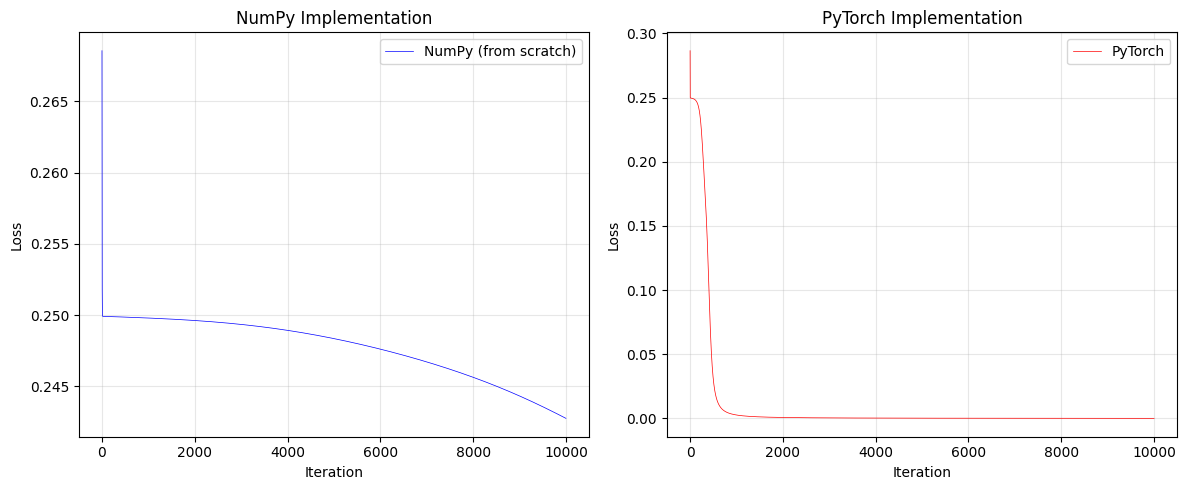


Both implementations achieve the same result!
   PyTorch just automates the gradient calculations.


In [ ]:
# Compare loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history, 'b-', linewidth=0.5, label='NumPy (from scratch)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('NumPy Implementation')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pytorch_loss_history, 'r-', linewidth=0.5, label='PyTorch')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PyTorch Implementation')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("\nBoth implementations achieve the same result!")
print("   PyTorch just automates the gradient calculations.")